## Material for NATL60 Geophysical Model Development 
### Description of NATL60 vertical grid

 - **author** : Julien Le Sommer
 - **purpose** : plotting NATL60 vertical grid for NATL60 GMD paper


### Importing libraries

In [136]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Reading data file

In [116]:
!ls ~/data/models/NATL60/NATL60-CJM165/grid/

NATL60-I                    gdep.txt
fraction_area_per_level.csv


In [143]:
home = os.path.expanduser('~') 

In [144]:
## path to data file 
## to be be updated before submission
depfile = home + '/data/models/NATL60/NATL60-CJM165/grid/gdep.txt'
dfd = pd.read_csv(depfile, header=1, skiprows=0, skipinitialspace=True, sep=' ', usecols=[1,2,3,4])
dfd.head()

,gdept_1d,gdepw_1d,e3t_1d,e3w_1d
0,0.48,0.00,1.00,0.92
1,1.56,1.00,1.16,1.08
2,2.79,2.16,1.31,1.24
3,4.19,3.47,1.47,1.39
4,5.74,4.94,1.63,1.55


In [145]:
areafile = home + '/data/models/NATL60/NATL60-CJM165/grid/fraction_area_per_level.csv'
dfa = pd.read_csv(areafile)
dfa.head()

,z,fraction_area
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


### Plotting layer thickness as a function of depth

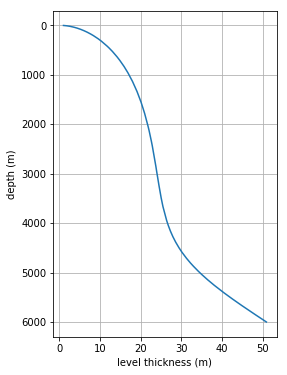

In [119]:
fig, ax = plt.subplots(figsize=(4,6))
ax.plot( dfd['e3t_1d'],dfd['gdepw_1d'])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('level thickness (m)')
ax.set_ylabel('depth (m)')
ax.grid('on')
plt.show()

### Plotting area fraction as a function of depth

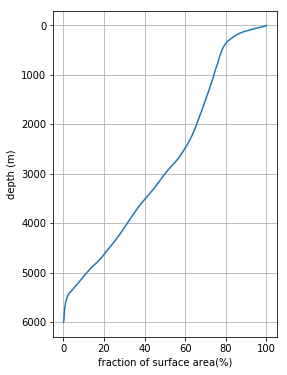

In [124]:
fig, ax = plt.subplots(figsize=(4,6))
ax.plot( 100. * dfa['fraction_area'],df['gdepw_1d'][:-1])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('fraction of surface area (%)')
ax.set_ylabel('depth (m)')
ax.grid('on')
plt.show()

### Combining the two information in a single plot

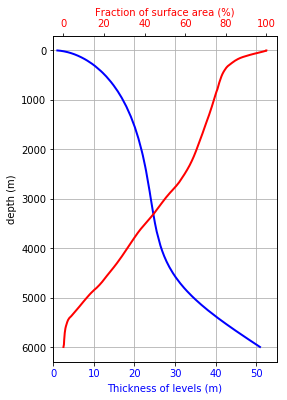

In [150]:
x1 = dfd['e3t_1d'][:-1]
x2 = 100. * dfa['fraction_area']
y = df['gdepw_1d'][:-1]

fig, ax = plt.subplots(figsize=(4,6))

# Plot y1 vs x in blue on the left vertical axis.
plt.ylabel("depth (m)")
plt.xlabel("Thickness of levels (m)", color="b")
ax.set_xlim(0,55)
plt.tick_params(axis="x", labelcolor="b")
plt.plot(x1, y, "b-", linewidth=2)

# Plot y2 vs x in red on the right vertical axis.
plt.twiny()
plt.xlabel("Fraction of surface area (%)", color="r")
ax.set_xlim(0,55)
plt.tick_params(axis="x", labelcolor="r")
plt.plot(x2, y, "r-", linewidth=2)

ax.set_ylim(ax.get_ylim()[::-1])
ax.grid('on')
plt.show()

### Exporting the figure

In [151]:
fig.savefig(home + "/git/2017-paper-natl60-gmd/figures/NATL60_vertical_grid.png", dpi=75, format="png")
